# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./train.p"
testing_file = "./test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_training, y_training = train['features'], train['labels']
X_testing, y_testing = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_training)

# TODO: Number of testing examples.
n_test = len(y_testing)

# TODO: What's the shape of an traffic sign image?
image_shape = format(X_training[0].shape)

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_training)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 42


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
# Problem 1 - Implement Min-Max scaling for grayscale image data
import numpy as np

def mean_subtract(image_data):
    image_data-=np.mean(image_data)
    
    return image_data

def normalize_grayscale(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    gray = grayscale(image_data)
    
    a = -1.0
    b = 1.0
    grayscale_min = 0
    grayscale_max = 255
    return a + ( ( (gray - grayscale_min)*(b - a) )/( grayscale_max - grayscale_min ) )

def grayscale(image_data):
    
    result=np.empty((image_data.shape[0], image_data.shape[1], 1))
    #val=np.round(np.sum(image_data, axis=2)/3)
    val=np.round(np.add(np.add(0.21*image_data[:, :, 0], 0.726*image_data[:,:,1]), 0.07*image_data[:, :, 2]))
    result[:, :, 0]=val
    return result.astype('uint8')

def normalize(image_data):
    
    a = -1.0
    b = 1.0
    val_min = 0
    val_max = 255
    return a + (((image_data - val_min)*(b - a))/(val_max - val_min))


def histogram_equalize(image_data):
    hist, bins= np.histogram(image_data.flatten(),256, [0, 256])
    cdf=hist.cumsum()
    cdf_normalized=cdf*hist.max()/cdf.max()
    cdf_m=np.ma.masked_equal(cdf,0)
    cdf_m=(cdf_m-cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
    cdf=np.ma.filled(cdf_m, 0).astype('uint8')
    img2=cdf[image_data]
    return img2

In [5]:
import numpy as np

training_data=np.empty((X_training.shape[0], X_training.shape[1], X_training.shape[2], 1))

for i in range(len(X_training)):
    training_data[i]=mean_subtract(normalize(histogram_equalize(grayscale(X_training[i]))))#normalize_grayscale(X_training[i])

testing_data=np.empty((X_testing.shape[0], X_testing.shape[1], X_testing.shape[2], 1))

for i in range(len(X_testing)):
    testing_data[i]=mean_subtract(normalize(histogram_equalize(grayscale(X_testing[i]))))#normalize_grayscale(X_test[i])


7


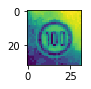

In [6]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(training_data))
image=training_data[index].squeeze()
plt.figure(figsize=(1,1))
plt.imshow(image)
print(y_training[index])


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Firstly I convert the RGB image into grayscale by luminosity grayscale because it speeds up the training process as we only train 1 channel instead of 3. Luminosity grayscaling is preferred over average grayscaling because the traffic signs are apparently designed for human eyes to notice. Secondly, the image is fed into histogram equalization function in order to compensate for several lightings conditions of the images. The image is then normalized into -1 to 1 range. In this way the inputs will be roughly zero means and equal variance which is easier for the optimizer. Lastly, I zeroed the mean of the inputs by mean subtraction from each image.

In [7]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

training_label=y_training
testing_label=y_testing

combined_data=np.concatenate((training_data, testing_data), axis=0)
combined_label=np.concatenate((training_label, testing_label), axis=0)

combined_data, combined_label = shuffle(combined_data, combined_label)

validation_data=combined_data[0:n_test]
validation_label=combined_label[0:n_test]


13


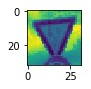

In [8]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(validation_data))
image = validation_data[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(validation_label[index])

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The validation data is taken from the pool of training+testing data. All the data groups are shuffled before training and testing. The training set and testing set are always separate and preprocessed separately.

In [9]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

def LeNet(x):  
    # Hyperparameters
    mu = 0
    sigma = 0.1

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b

    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)

    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b

    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b

    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. 
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, n_classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(n_classes))
    logits = tf.matmul(fc2, fc3_W) + fc3_b

    return logits

In [26]:
import tensorflow as tf
from tensorflow.contrib.layers import flatten

#EPOCHS = 20
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

rate=0.00002
#rate = 0.0001
#rate=0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** The model implemented here is LeNet with the following layers:

Convolution layer 1 Input = 32x32x1. Output = 28x28x6

Activation 1 

Pooling layer 1 Input = 28x28x6. Output = 14x14x6.

Convolution layer 2 Input=14x14x6. Output = 10x10x16.

Activation 2

Pooling layer 2 Input = 10x10x16. Output = 5x5x16.

Flatten layer Input = 5x5x16. Output = 400x1

Fully Connected layer 1 Input = 400. Output = 120.

Activation 3 

Fully Connected layer 2 Input = 120. Output = 84.

Activation 4

Fully Connected layer 3 Input = 84. Output = 43

Convolution layers are implemented to make the model robust to translational invariance of the inputs. Here valid paddings are used.  
Activation layers are put after each convolutions and fully connected layers, in this case relu rectifiers.
Pooling layers are also added to prevent overfitting and decrease the size of the output. Here we use max pooling to preserve the high value neurons. 

The required parameters are the mean and standard deviation values for weights and bias initialization.


In [27]:
### Train your model here.
### Feel free to use as many code cells as needed.

X_train=training_data
y_train=training_label

X_test=testing_data
y_test=testing_label

X_validation=validation_data
y_validation=validation_label


assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

print(np.max(X_test), np.min(X_test))



Image Shape: (32, 32, 1)

Training Set:   39209 samples
Validation Set: 12630 samples
Test Set:       12630 samples
1.24460784314 -1.43025428922


In [28]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

previous_accuracy=0

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    i=0
    while True:
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        i+=1
        if validation_accuracy>0.85 or validation_accuracy-previous_accuracy<-0.010:
            break
        
        previous_accuracy=validation_accuracy
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.086

EPOCH 2 ...
Validation Accuracy = 0.119

EPOCH 3 ...
Validation Accuracy = 0.196

EPOCH 4 ...
Validation Accuracy = 0.268

EPOCH 5 ...
Validation Accuracy = 0.325

EPOCH 6 ...
Validation Accuracy = 0.362

EPOCH 7 ...
Validation Accuracy = 0.399

EPOCH 8 ...
Validation Accuracy = 0.431

EPOCH 9 ...
Validation Accuracy = 0.464

EPOCH 10 ...
Validation Accuracy = 0.489

EPOCH 11 ...
Validation Accuracy = 0.513

EPOCH 12 ...
Validation Accuracy = 0.532

EPOCH 13 ...
Validation Accuracy = 0.551

EPOCH 14 ...
Validation Accuracy = 0.574

EPOCH 15 ...
Validation Accuracy = 0.587

EPOCH 16 ...
Validation Accuracy = 0.598

EPOCH 17 ...
Validation Accuracy = 0.614

EPOCH 18 ...
Validation Accuracy = 0.622

EPOCH 19 ...
Validation Accuracy = 0.636

EPOCH 20 ...
Validation Accuracy = 0.644

EPOCH 21 ...
Validation Accuracy = 0.653

EPOCH 22 ...
Validation Accuracy = 0.663

EPOCH 23 ...
Validation Accuracy = 0.673

EPOCH 24 ...
Validation Accura

In [29]:

with tf.Session() as sess:
    #loader=tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.725


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I uses Lenet architecture as it is a powerful CNN for beginners. I set the batch size as 128, epochs to 25, and learning rate < 0.0001 because the normalized data has value < 1 and small resolution 1/255. 

Training is done without fixed epochs. Instead I will train until the validation accuracy decreases with a threshold difference. This is done to prevent overfitting, while searching for the local optimum parameters.

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I conducted several trial and error by tuning the hyperparameters. From there, I can find the optimum or local optima values. 

This architecture is good in tackling image classification problem because in each layers, it memorizes the recognition complexity increases. As to recognize an image, we need to combine several simpler features, therefore the layers recognize the images from simple features to the more complex object identification.




---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

#test_images=['imagenet/1.jpg', 'imagenet/2.jpg', 'imagenet/3.jpg', 'imagenet/5.JPG','imagenet/6.jpg', 'imagenet/7.jpg', 'imagenet/9.jpg', 'imagenet/10.jpg', 'imagenet/11.jpg', 'imagenet/12.jpg', 'imagenet/13.jpg', 'imagenet/14.jpg', 'imagenet/15.jpg', 'imagenet/17.jpg', 'imagenet/18.jpg', 'imagenet/19.jpg', 'imagenet/20.jpg']
#test_images_labels=[2, 14, 22, 27, 27, 35, 2, 18, 34, 17, 1, 29, 27, 35, 13, 40, 33]


test_images=['imagenet/a.jpg', 'imagenet/b.jpg', 'imagenet/c.jpg', 'imagenet/d.jpg','imagenet/e.jpg', 'imagenet/f.jpg', 'imagenet/g.jpg', 'imagenet/h.jpg', 'imagenet/i.jpg', 'imagenet/j.jpg', 'imagenet/k.jpg', 'imagenet/l.jpg', 'imagenet/m.jpg','imagenet/1.jpg', 'imagenet/2.jpg', 'imagenet/3.jpg', 'imagenet/5.JPG','imagenet/6.jpg', 'imagenet/9.jpg', 'imagenet/10.jpg', 'imagenet/11.jpg', 'imagenet/12.jpg', 'imagenet/13.jpg', 'imagenet/14.jpg', 'imagenet/15.jpg', 'imagenet/17.jpg', 'imagenet/18.jpg', 'imagenet/19.jpg', 'imagenet/20.jpg']
test_images_labels=[35, 17, 13, 16, 25, 0, 27, 1, 28, 12, 38, 14, 33, 2, 14, 22, 27, 27, 2, 18, 34, 17, 1, 29, 27, 35, 13, 40, 33]

images=list()

for i in test_images:
    image = mpimg.imread(i)
    #normal = normalize(image)
    images.append(mean_subtract(normalize(histogram_equalize(grayscale(image)))))

#for i in images:
#    plt.figure(figsize=(1,1))
#    plt.imshow(i.squeeze())


In [31]:
images=np.asarray(images)

print(np.amax(images), np.amin(images))

1.03089767157 -1.02198988971


### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** Images with small/finer details are more difficult to distinguish such as bicyles, pedestrians, children, or animals. Additionally, distortions in perspective makes it harder for the model to classify. Moreover lighting conditions, viewpoint variations, motion-blur, occlusions, sun glare, fading colors, stickers, and other physical distortion of the signboard will make detection harder.

In [32]:
### Run the predictions here.
### Feel free to use as many code cells as needed
#x = tf.placeholder(tf.float32, (None, 32, 32, 3))
#logits=LeNet(x)
#labels=tf.argmax(logits, 1)

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    #for image in images:
        #plt.figure(figsize=(1,1))
        #plt.imshow(image)

    test_accuracy = evaluate(images, test_images_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy)) 
    

Test Accuracy = 0.621


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** This model can predict newly acquired images to the accuracy of 0.480-0.690. Validation set gives 0.850 and X_test gives 0.791. This shows that the model needs more similarly acquired images from google streetview. The model has suit the sign from training sets, however it is not yet fine-tuned for jitter, contrast, brightness level, or viewpoints of the newly acquired images.

In [33]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    probability=sess.run(logits, feed_dict={x: images})
    
    softmax=sess.run(tf.nn.softmax(probability))
    #print(softmax)


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** 

TopKV2(values=array([[ 0.99999952],
       [ 0.58902627],
       [ 0.99999523],
       [ 0.99660754],
       [ 0.40448898],
       [ 0.92559886],
       [ 0.97459507],
       [ 0.94832242],
       [ 0.9739303 ],
       [ 0.99892622],
       [ 0.94996113],
       [ 0.99780053],
       [ 0.75836867],
       [ 0.68718547],
       [ 0.58490956],
       [ 0.58004761],
       [ 0.75889492],
       [ 0.35119689],
       [ 0.64315349],
       [ 0.9997316 ],
       [ 0.99995089],
       [ 0.36963087],
       [ 0.61634296],
       [ 0.73223364],
       [ 0.45313987],
       [ 0.99973041],
       [ 1.        ],
       [ 0.63003427],
       [ 0.94838858]], dtype=float32), indices=array([[35],
       [17],
       [13],
       [16],
       [26],
       [ 0],
       [26],
       [ 1],
       [27],
       [12],
       [38],
       [14],
       [33],
       [ 9],
       [35],
       [35],
       [ 0],
       [18],
       [ 2],
       [18],
       [34],
       [35],
       [ 1],
       [ 2],
       [ 1]

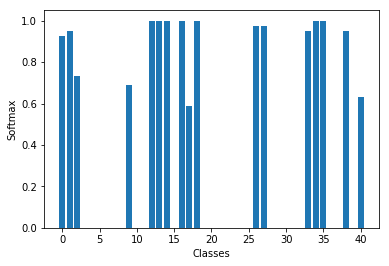

In [34]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    probability=sess.run(logits, feed_dict={x: images})
    
    top=sess.run(tf.nn.top_k(tf.nn.softmax(probability), k=5))
    
    
    softmax_prob=sess.run(tf.nn.top_k(tf.nn.softmax(probability), k=1))
    print(softmax_prob)
    plt.bar(softmax_prob.indices, softmax_prob.values)
    plt.xlabel('Classes')
    plt.ylabel('Softmax')
    print(top)
    

        
    

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


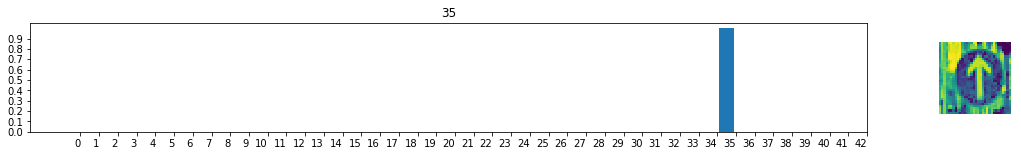

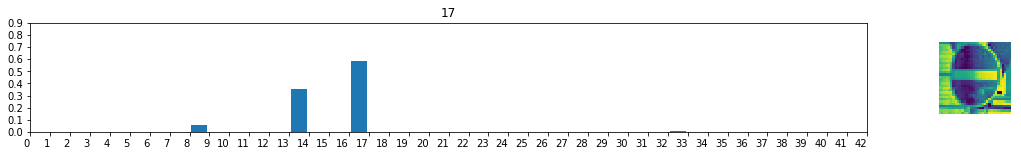

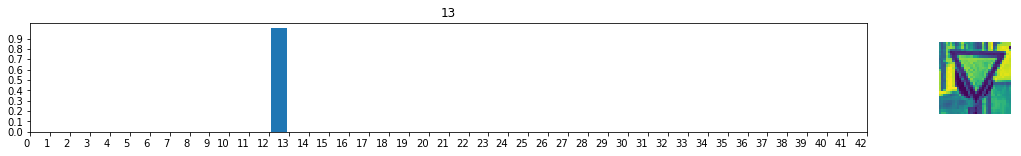

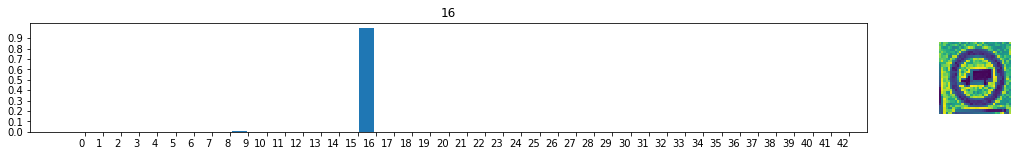

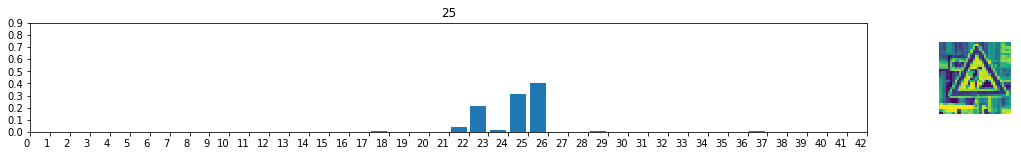

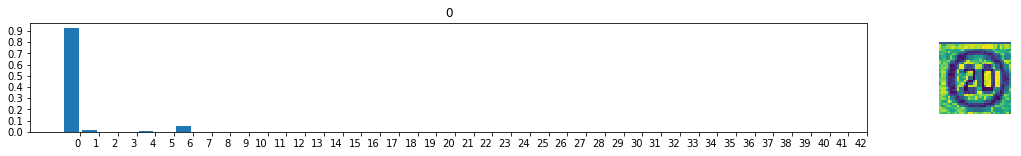

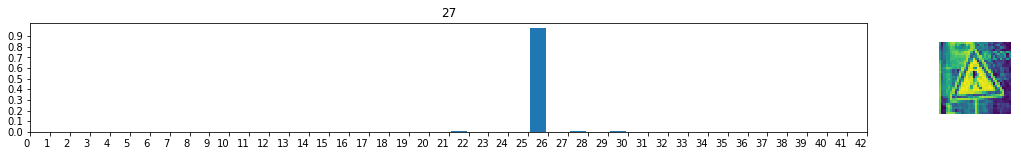

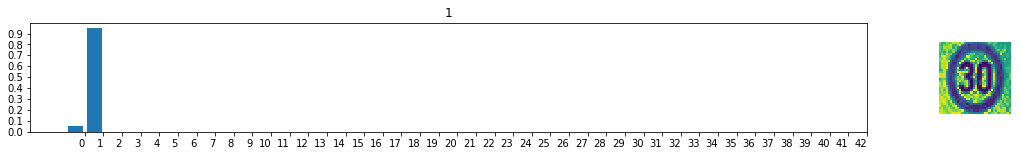

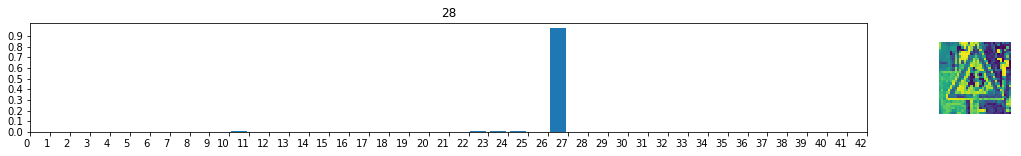

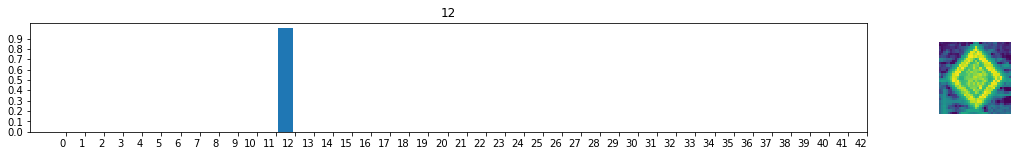

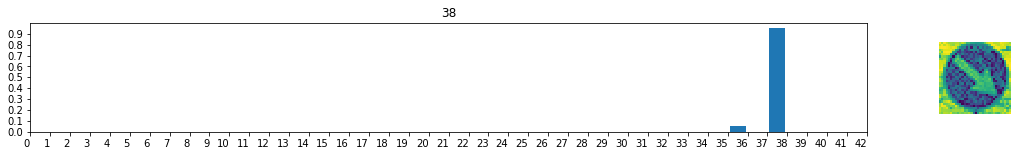

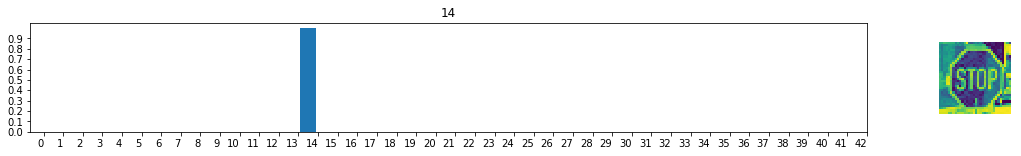

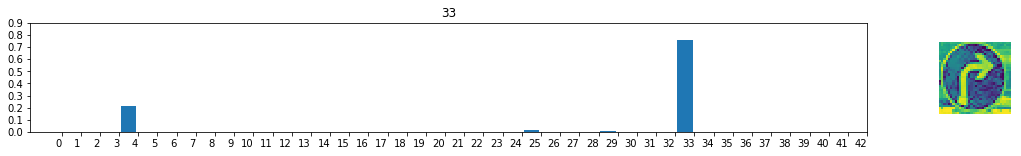

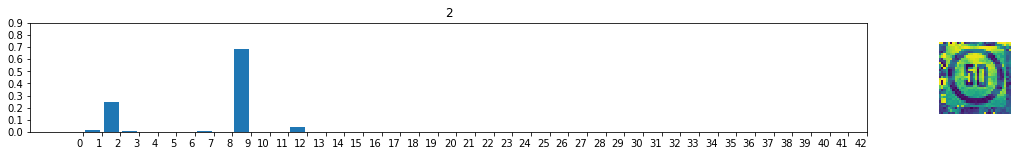

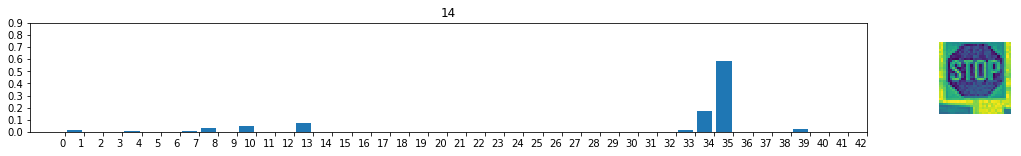

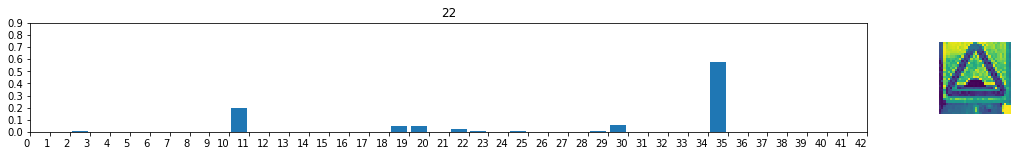

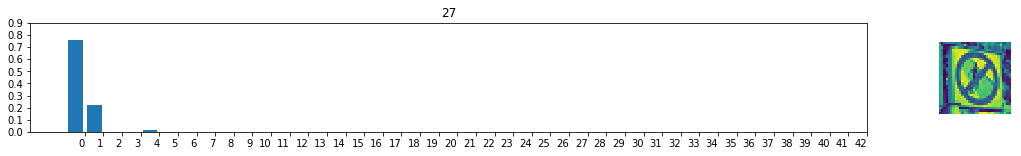

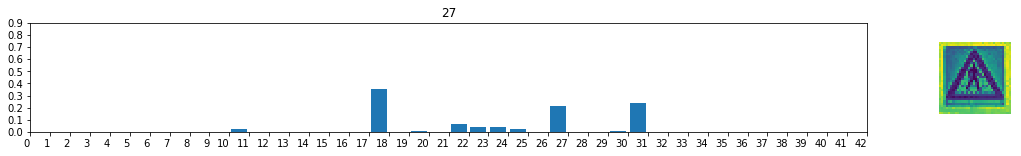

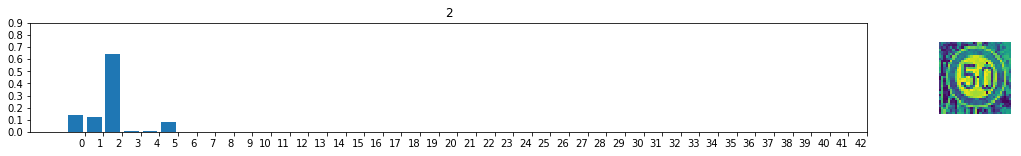

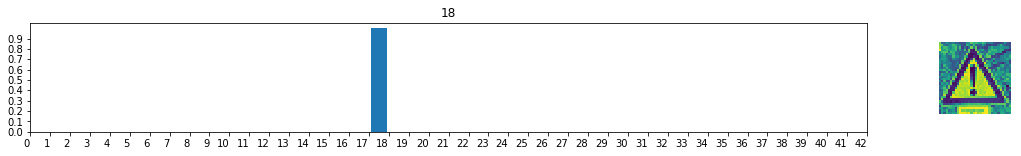

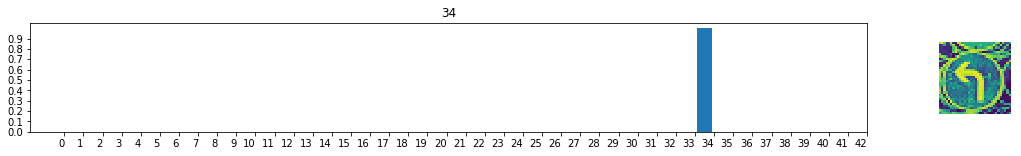

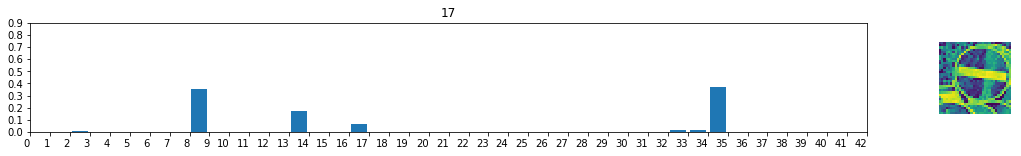

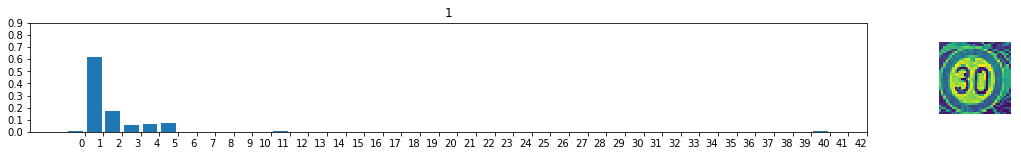

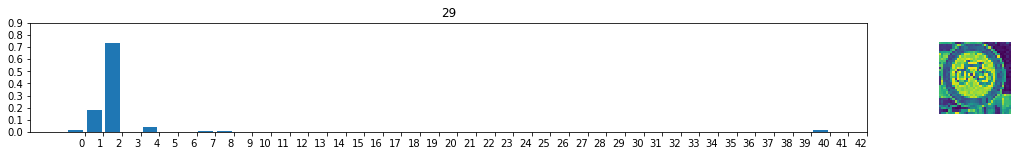

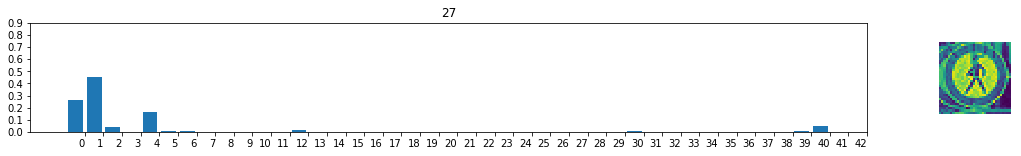

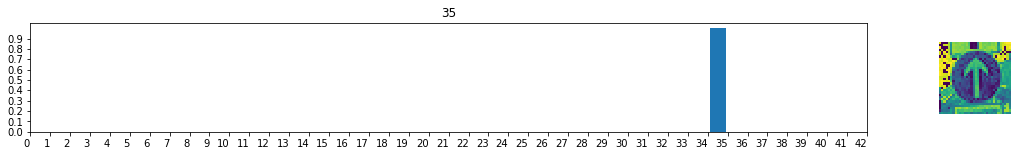

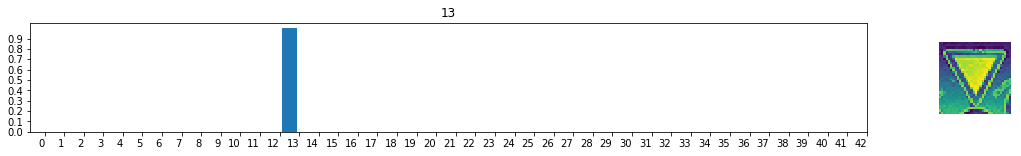

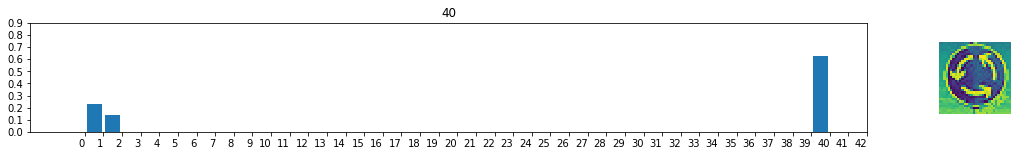

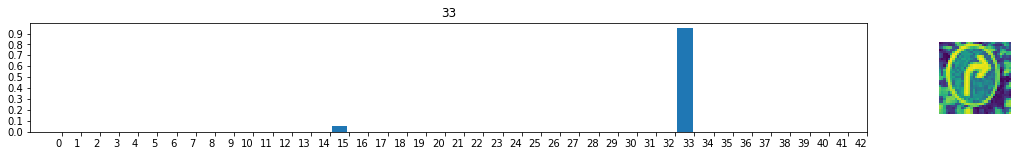

In [35]:
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    probability=sess.run(logits, feed_dict={x: images})
    
    top_predictions=sess.run(tf.nn.top_k(tf.nn.softmax(probability), k=10))
    
    for i, (labels, probs, candidate) in enumerate(zip(top_predictions.indices, top_predictions.values, images)):
        fig=plt.figure(figsize=(15,2))
        plt.bar(labels, probs)
        plt.title(test_images_labels[i])

        plt.xticks(np.arange(0.5, 43.5, 1.0), np.unique(y_train), ha='right')
        plt.yticks(np.arange(0.0, 1.0, 0.1), np.arange(0.0, 1.0, 0.1))
        ax=plt.axes([.75, 0.25, 0.5, 0.5], frameon=True)
        ax.imshow(candidate.squeeze())
        ax.axis('off')

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.